# ML Exercise 1 - Linear Regression

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem. We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

## Univariate

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

In [2]:
print(os.getcwd())

/Users/markmo/src/ML/mllearn/notebooks


In [3]:
path = os.getcwd() + '/../data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


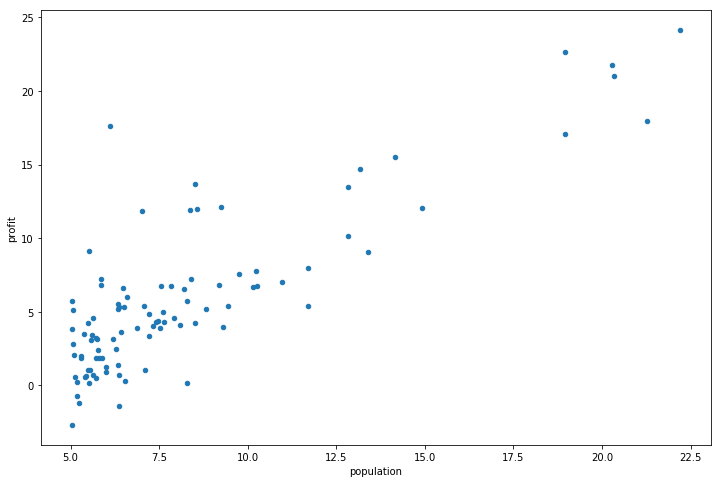

In [5]:
data.plot(kind='scatter', x='population', y='profit', figsize=(12, 8))

Now let's implement linear regression using gradient descent to minimize the cost function.

First we'll create a function to compute the cost of a given solution (characterized by the parameters `w`).

In [6]:
def compute_cost(x, y, w):
    inner = np.power(x * w.T - y, 2)
    return np.sum(inner) / (2 * len(x))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [7]:
data.insert(0, 'ones', 1)

In [8]:
# set x (training data) and y (target variable)
cols = data.shape[1]
x = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [9]:
x.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert x and y before we can use them. We also need to initialize w.

In [11]:
x = np.matrix(x.values)
y = np.matrix(y.values)
w = np.matrix(np.array([0, 0]))

In [12]:
x.shape, w.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for w).

In [13]:
compute_cost(x, y, w)

32.072733877455676

So far so good. Now we need to define a function to perform gradient descent on the parameters w using the update rules defined in the text.

In [14]:
def gradient_descent(x, y, w, learning_rate, n_epochs):
    temp = np.zeros(w.shape)
    params = int(w.ravel().shape[1])
    cost = np.zeros(n_epochs)
    
    for i in range(n_epochs):
        err = (x * w.T) - y
        for j in range(params):
            term = np.multiply(err, x[:, j])
            temp[0, j] = w[0, j] - learning_rate / len(x) * np.sum(term)
            
        w = temp
        cost[i] = compute_cost(x, y, w)
        
    return w, cost

Initialize hyperparameters

In [15]:
learning_rate = 0.01
n_epochs = 1000

Now let's run the gradient descent algorithm to fit our parameters `w` to the training set.

In [16]:
g, cost = gradient_descent(x, y, w, learning_rate, n_epochs)
g

array([[-3.24140214,  1.1272942 ]])

In [17]:
compute_cost(x, y, g)

4.515955503078912

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5,1,'Predicted Profit vs. Population Size')

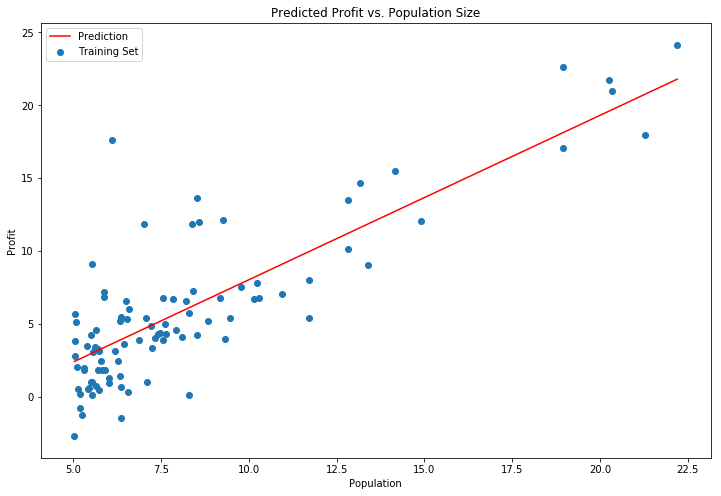

In [18]:
a = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + (g[0, 1] * a)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(a, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Training Set')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good! Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5,1,'Error vs. Training Epoch')

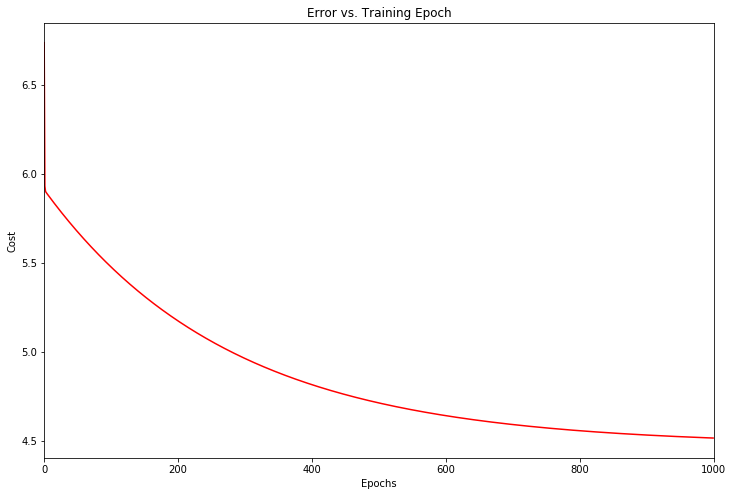

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, n_epochs)
ax.plot(np.arange(n_epochs), cost, 'r')
ax.set_xlabel('Epochs')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Multivariate

Exercise 1 also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). Let's use the techniques we already applied to analyze that data set as well.

In [20]:
path = os.getcwd() + '/../data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['size', 'bedrooms', 'price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features. This is very easy with pandas.

In [21]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [22]:
# add ones column (not an idempotent operation)
data2.insert(0, 'ones', 1)

In [23]:
# set x (training data) and y (target variable)
cols = data2.shape[1]
x2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
x2 = np.matrix(x2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix([0, 0, 0])

# perform linear regression on the data set
g2, cost2 = gradient_descent(x2, y2, w2, learning_rate, n_epochs)

# get the cost (error) of the model
compute_cost(x2, y2, g2)

0.13070336960771892

We can take a quick look at the training progess for this one as well.

Text(0.5,1,'Error vs. Training Epoch')

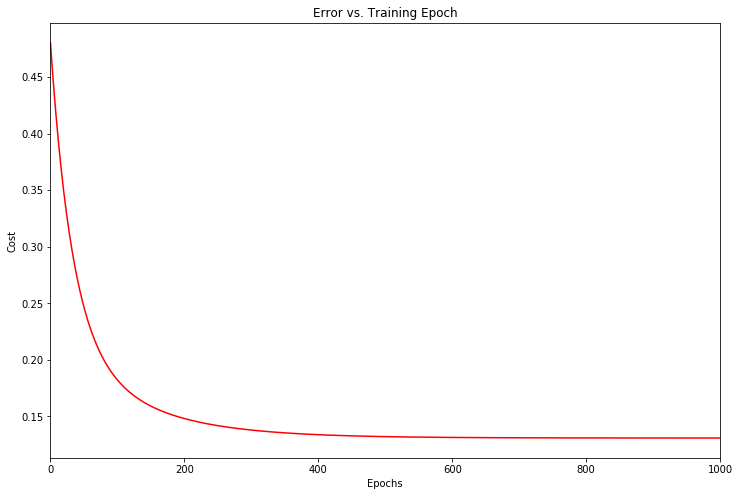

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, n_epochs)
ax.plot(np.arange(n_epochs), cost2, 'r')
ax.set_xlabel('Epochs')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function. Let's apply scikit-learn's linear regression algorithm to the data from part 1 and see what it comes up with.

In [25]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Here's what the scikit-learn model's predictions look like.

Text(0.5,1,'Predicted Profit vs. Population Size')

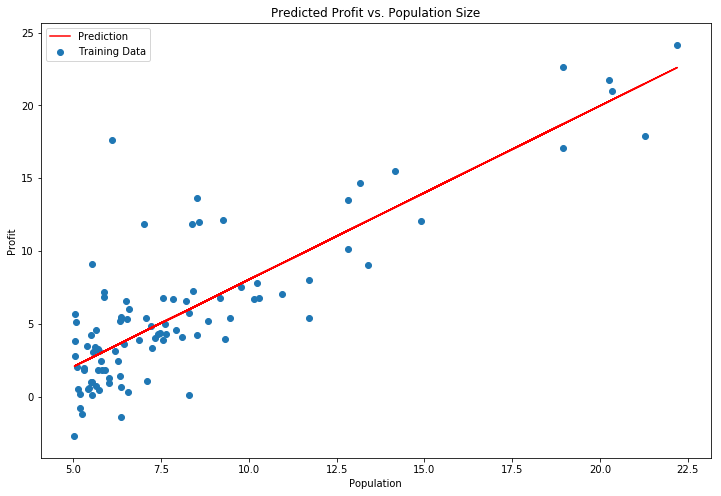

In [26]:
a = np.array(x[:, 1].A1)
f = model.predict(x).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(a, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')